In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import scienceplots

import COMBINE_harmonizer
from COMBINE_harmonizer import cfg

plt.style.use('nature')
plt.rcParams['legend.frameon'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# Objective

The purpose of this `.ipynb` is to investigate the distribution of the Bayley-III Scales when the patients are evaluated as no significant abnormal MRI findings (`MRI NRN Pattern of Injury score = 0`).

In [2]:
root_dir = '../'
COMBINE_harmonizer.init(f'{root_dir}/config.yaml')

input_dir = f"{cfg.config['out_dir']}/out-publish-normalized"
out_dir = f"{cfg.config['out_dir']}/stats"

In [3]:
filename = f'{input_dir}/zz-merged-flatten.csv'

In [4]:
df = pd.read_csv(filename, dtype='O')
is_valid = df['31-03:MRINRNPatternOfInjuryMerge'] == '0'
df_valid = df[is_valid]
len(df_valid)

192

In [5]:
df_cog = df_valid.groupby(['20-04:BayleyIIICognitiveComposite'], as_index=False).agg(count=('uniqueID', 'count')).astype(int).sort_values(by=['20-04:BayleyIIICognitiveComposite'])
df_lang = df_valid.groupby(['20-04:BayleyIIILanguageComposite'], as_index=False).agg(count=('uniqueID', 'count')).astype(int).sort_values(by=['20-04:BayleyIIILanguageComposite'])
df_motor = df_valid.groupby(['20-04:BayleyIIIMotorComposite'], as_index=False).agg(count=('uniqueID', 'count')).astype(int).sort_values(by=['20-04:BayleyIIIMotorComposite'])

df_cog['count'].sum(), df_lang['count'].sum(), df_motor['count'].sum()

(np.int64(169), np.int64(166), np.int64(166))

/var/folders/84/vxdpc5mx2cqdr6zvp8p_tygc0000gn/T/ipykernel_46981/3180460136.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


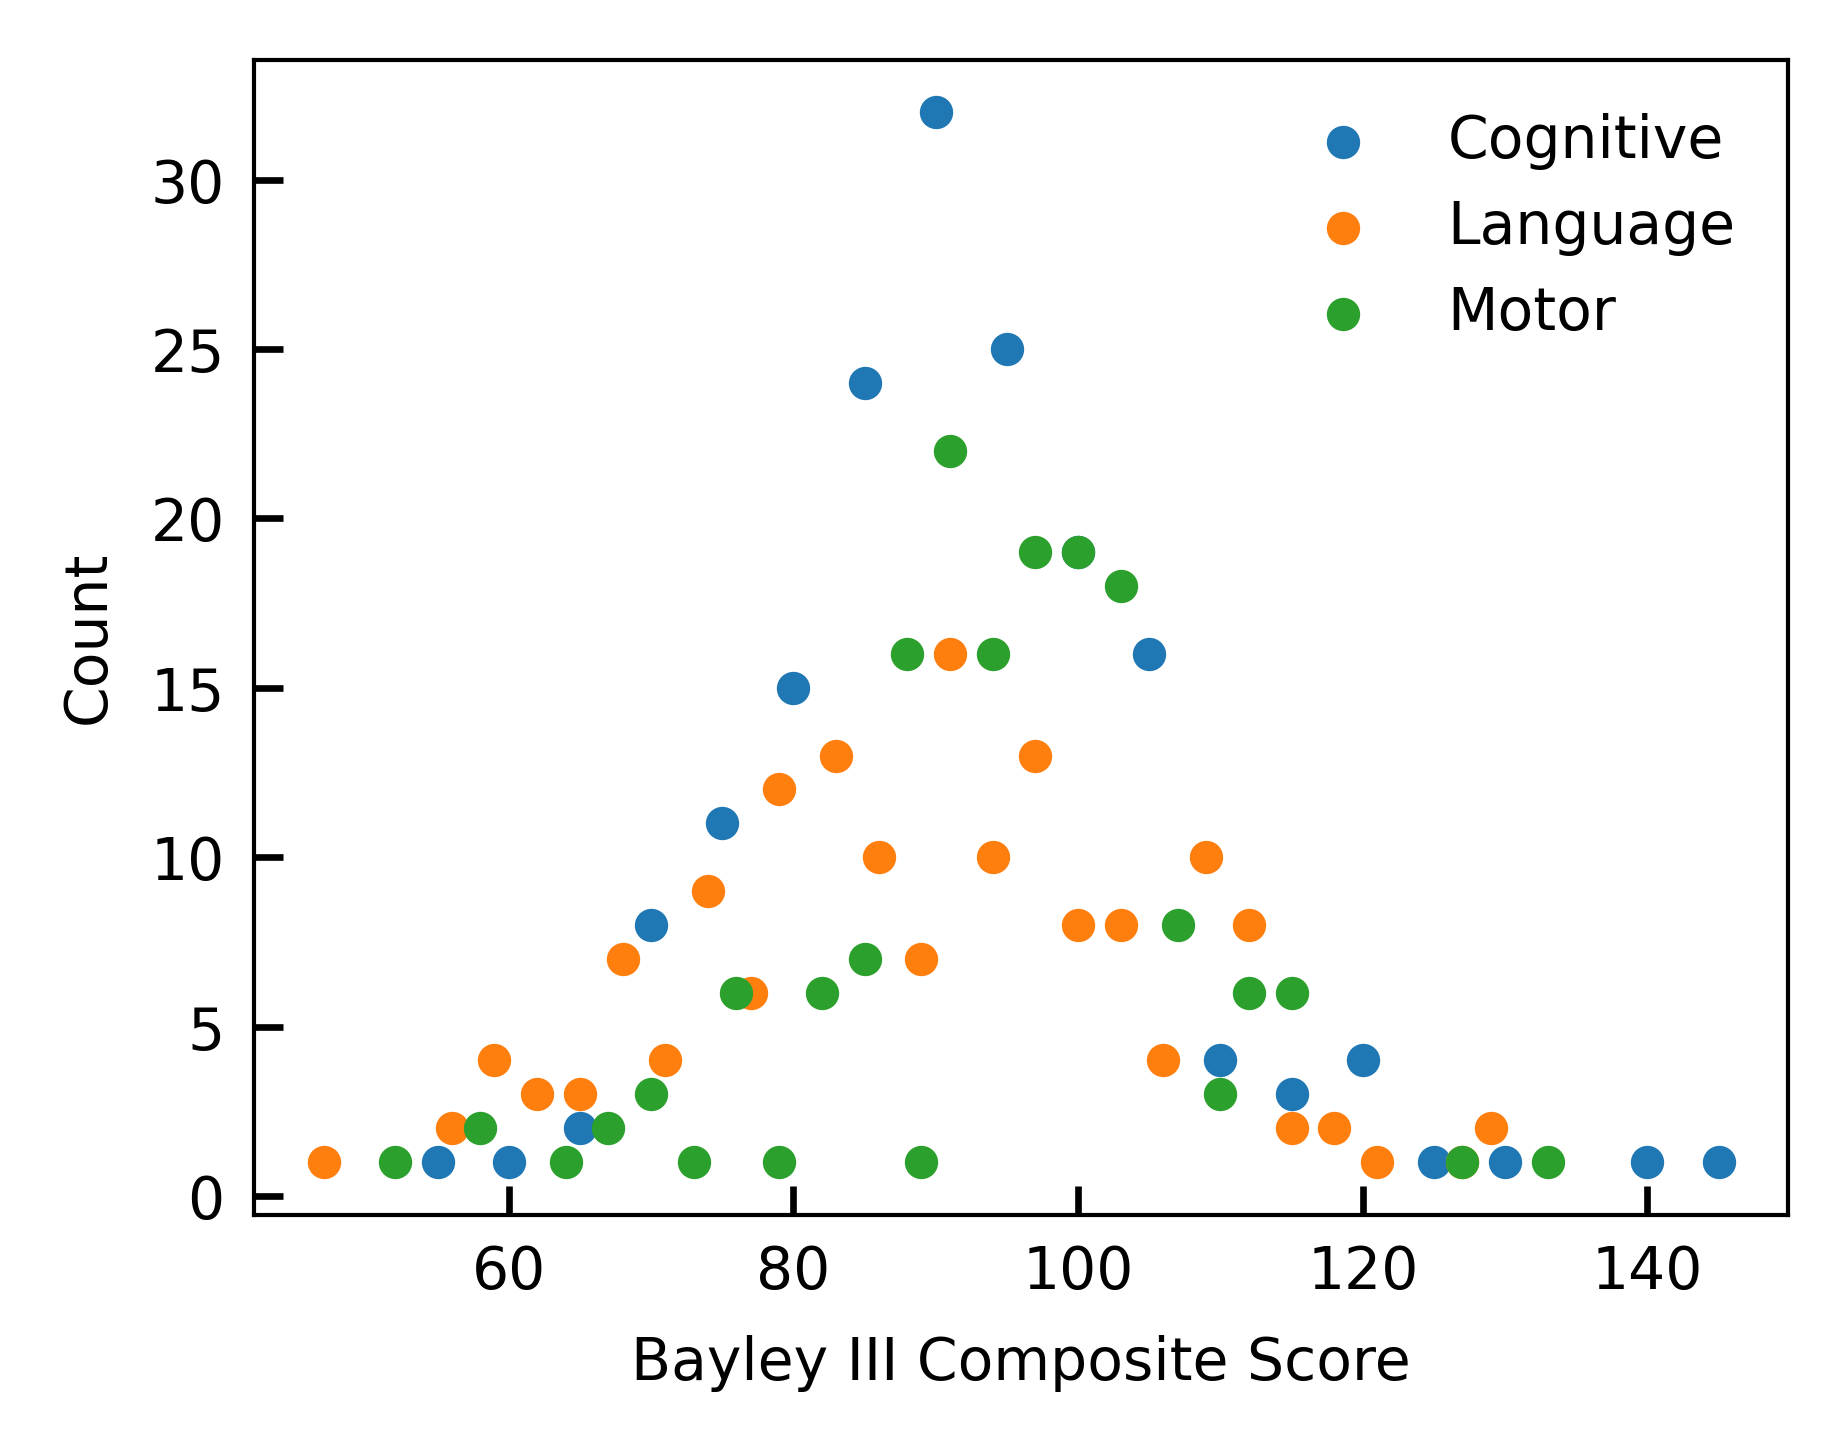

In [6]:
fig = plt.figure(dpi=600)
plt.scatter(x=df_cog['20-04:BayleyIIICognitiveComposite'], y=df_cog['count'], label='Cognitive')
plt.scatter(x=df_lang['20-04:BayleyIIILanguageComposite'], y=df_lang['count'], label='Language')
plt.scatter(x=df_motor['20-04:BayleyIIIMotorComposite'], y=df_motor['count'], label='Motor')
plt.xlabel('Bayley III Composite Score')
plt.ylabel('Count')
plt.legend()
fig.show()

out_filename = f'{out_dir}/figure/MRI-Score0-Distribution.pdf'
fig.savefig(out_filename, bbox_inches = "tight")